# Лабораторная работа №1: Первичное исследование данных


## 1. Постановка задачи

### Описание датасета
Датасет содержит 15000 записей с характеристиками смартфонов различных брендов, включая технические параметры (размер экрана, объем памяти, батарея), цену, год выпуска и дополнительные функции.

### Условный заказчик
Онлайн-агрегатор товаров, например «ЯндексМаркет» или «СберМегаМаркет»

### Возможные задачи ИАД
1. Сегментация смартфонов (бюджетные, флагманы, геймерские)
2. Поиск закономерности между размером характеристиками смартфона и его ценой
3. Анализ рыночных трендов по годам выпуска

## 2. Паспорт датасета

### Загрузка данных

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Загрузка данных
df = pd.read_csv(r'C:\Desktop\Education\4 семестр\Интеллектуальный анализ данных\ЛР №1\data\smartphones.csv')  # Путь к вашему файлу
print(f'Размер датасета: {df.shape[0]} строк, {df.shape[1]} столбцов')
df.head()

### Структура данных

In [280]:
# Описание признаков
features_info = {
    'Признак': [
        'id',
        'brand_name',
        'model',
        'screen_size',
        'price',
        'release_year',
        'operating_system',
        'battery_capacity',
        'ram',
        'storage',
        'camera_mp',
        'front_camera_mp',
        'refresh_rate',
        'weight',
        'thickness',
        'body_material',
        'chipset',
        'gpu',
        'dual_sim',
        'network_support',
        'bluetooth_version',
        'wifi_version',
        'usb_type',
        'fast_charging',
        'fingerprint_sensor'
    ],
    'Предположительный смысл': [
        'Уникальный идентификатор записи',
        'Название бренда производителя смартфона',
        'Модель смартфона',
        'Размер экрана в дюймах',
        'Цена устройства в рублях (предположительно)',
        'Год выпуска модели на рынок',
        'Операционная система (Android/iOS)',
        'Ёмкость аккумулятора в мАч',
        'Объем оперативной памяти в ГБ',
        'Объем встроенной памяти в ГБ',
        'Разрешение основной камеры в мегапикселях',
        'Разрешение фронтальной камеры в мегапикселях',
        'Частота обновления экрана в Гц',
        'Вес устройства в граммах',
        'Толщина устройства в миллиметрах',
        'Материал корпуса (пластик, металл, стекло)',
        'Модель процессора',
        'Графический процессор',
        'Поддержка двух SIM-карт',
        'Поддерживаемые сети связи (4G/5G)',
        'Версия Bluetooth',
        'Версия Wi-Fi',
        'Тип USB-разъема',
        'Мощность быстрой зарядки в ваттах',
        'Наличие сканера отпечатка пальцев'
    ]
}

# DataFrame с информацией
features_df = pd.DataFrame(features_info)
print("Информация о признаках:")
print(features_df.to_string(index=False))
print()

# # Преобразование бинарных признаков
# print("Преобразование бинарных признаков <<dual_sim>> и <<fingerprint_sensor>>")
# binary_cols = ['dual_sim', 'fingerprint_sensor']
#
# for col in binary_cols:
#     if col in df.columns:
#         print(f"\nОбработка признака: {col}")
#         print(f"Уникальные значения до преобразования: {df[col].unique()}")
#         print(f"Количество пропусков: {df[col].isnull().sum()}")
#
#         # Преобразуем только существующие значения, пропуски остаются NaN
#         df[col] = df[col].replace({'Yes': 1, 'No': 0})
#
#         # Преобразуем в тип Int8 (он поддерживает NaN (Nullable Integer) и занимает меньше памяти)
#         df[col] = df[col].astype('Int8')
#
#         print(f"Уникальные значения после преобразования: {df[col].unique()}")
#         print(f"Тип данных после преобразования: {df[col].dtype}")
#         print(f"Распределение значений:")
#         print(df[col].value_counts(dropna=False))
#         print("-"*30)

# Информация о столбцах и типах
df.info()

# Статистика по числовым признакам
df.describe()

Информация о признаках:
           Признак                      Предположительный смысл
                id              Уникальный идентификатор записи
        brand_name      Название бренда производителя смартфона
             model                             Модель смартфона
       screen_size                       Размер экрана в дюймах
             price  Цена устройства в рублях (предположительно)
      release_year                  Год выпуска модели на рынок
  operating_system           Операционная система (Android/iOS)
  battery_capacity                   Ёмкость аккумулятора в мАч
               ram                Объем оперативной памяти в ГБ
           storage                 Объем встроенной памяти в ГБ
         camera_mp    Разрешение основной камеры в мегапикселях
   front_camera_mp Разрешение фронтальной камеры в мегапикселях
      refresh_rate               Частота обновления экрана в Гц
            weight                     Вес устройства в граммах
         thickne

,id,screen_size,price,release_year,battery_capacity,ram,storage,camera_mp,front_camera_mp,refresh_rate,weight,thickness,bluetooth_version,fast_charging
count,15000.000000,15000.000000,1.500000e+04,14997.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,7499.739267,6.105217,4.374510e+04,2020.044742,4512.019667,7.482533,241.267200,57.800533,18.636267,103.260800,195.200000,8.003520,5.101187,59.930867
std,4329.919043,0.635395,3.396243e+04,3.175566,863.122796,2.948764,172.606622,34.410025,9.959848,31.564613,26.361794,0.866221,0.081937,39.215959
min,1.000000,5.000000,5.000000e+03,2015.000000,3000.000000,4.000000,64.000000,12.000000,8.000000,60.000000,150.000000,6.500000,5.000000,18.000000
25%,3750.750000,5.560000,2.220800e+04,2017.000000,3780.000000,4.000000,128.000000,12.000000,8.000000,60.000000,172.000000,7.300000,5.000000,33.000000
50%,7499.500000,6.110000,3.795850e+04,2020.000000,4514.000000,8.000000,128.000000,48.000000,16.000000,90.000000,195.000000,8.000000,5.100000,67.000000
75%,11249.250000,6.650000,5.393850e+04,2023.000000,5259.000000,8.000000,512.000000,64.000000,32.000000,120.000000,218.000000,8.800000,5.200000,120.000000
max,15000.000000,7.200000,1.495630e+06,2025.000000,6000.000000,12.000000,512.000000,108.000000,32.000000,144.000000,240.000000,9.500000,5.200000,120.000000


## 3. Аудит качества данных

### 3.1. Пропуски

In [281]:
# Пропуски по столбцам
missing = pd.DataFrame({
    'Пропуски': df.isnull().sum(),
    'Доля (%)': (df.isnull().sum() / len(df) * 100).round(2)
}).sort_values('Пропуски', ascending=False)

if len(missing) > 0:
    print(missing[missing['Пропуски'] > 0])

# Топ-n признаков
n = 3
if len(missing) > 0:
    print(f"\nТоп-{n} признаков с наибольшим количеством пропусков:")
    print(missing.head(n))
else:
    print("\nПропусков в данных не обнаружено.")

print("""\n Наиболее проблемный признак — operating_system (больше всего пропусков).
- Критичные пропуски (сильно влияют на анализ): operating_system, brand_name, chipset, fingerprint_sensor. Это ключевые характеристики для оценки смартфона, его возможностей и признаки для категоризации.
- Не критические пропуски (минимальное влияние): body_material, release_year, wifi_version. Их отсутствие слабо искажает общую картину.""")


                    Пропуски  Доля (%)
operating_system           9      0.06
body_material              4      0.03
release_year               3      0.02
chipset                    1      0.01
brand_name                 1      0.01
fingerprint_sensor         1      0.01
wifi_version               1      0.01

Топ-3 признаков с наибольшим количеством пропусков:
                  Пропуски  Доля (%)
operating_system         9      0.06
body_material            4      0.03
release_year             3      0.02

 Наиболее проблемный признак — operating_system (больше всего пропусков).
- Критичные пропуски (сильно влияют на анализ): operating_system, brand_name, chipset, fingerprint_sensor. Это ключевые характеристики для оценки смартфона, его возможностей и признаки для категоризации.
- Не критические пропуски (минимальное влияние): body_material, release_year, wifi_version. Их отсутствие слабо искажает общую картину.


### 3.2. Дубликаты

In [282]:
# Полные дубликаты строк
duplicates = df.duplicated().sum()
print(f'Полных дубликатов строк: {duplicates}')

# Дубликаты без учёта идентификатора (при условии его присутствия)
if 'id' in df.columns:
    duplicates_without_id = df.drop('id', axis=1).duplicated().sum()
    print(f'Дубликатов без учёта id: {duplicates_without_id}')

    id_duplicates = df['id'].duplicated().sum()
    print(f'Дубликатов значений id: {id_duplicates}')

Полных дубликатов строк: 2
Дубликатов без учёта id: 5
Дубликатов значений id: 2


### 3.3. Выбросы (пример для одного признака)

Выбросов по методу IQR: 1092

Границы IQR:
 Q1 (25%): 22208.00
 Q3 (75%): 53938.50
 IQR: 31730.50
 Нижняя граница: -25387.75
 Верхняя граница: 101534.25
При анализе выбросов в ценах методом IQR:
• Обнаружено 1092 потенциальных выброса (только в верхней границе)
• Нижняя граница (-25 387) не имеет практического смысла для цен
• Все выбросы — товары дороже 101 534
• Для цен метод IQR требует модификации из-за асимметричного распределения


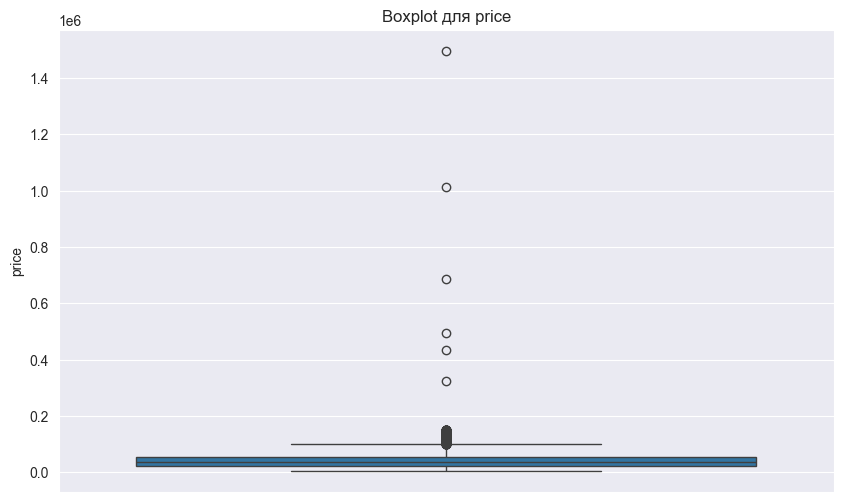

In [283]:
###!!!!!!!!!!!!!!!!!!!!Типические проблемы значений??????????????????

# Замените 'your_numeric_column' на реальное название столбца
column = 'price'
Q1 = df[column].quantile(0.25)
Q3 = df[column].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
print(f'Выбросов по методу IQR: {len(outliers)}')

print(f"\nГраницы IQR:")
print(f" Q1 (25%): {Q1:.2f}")
print(f" Q3 (75%): {Q3:.2f}")
print(f" IQR: {IQR:.2f}")
print(f" Нижняя граница: {lower_bound:.2f}")
print(f" Верхняя граница: {upper_bound:.2f}")

print("""При анализе выбросов в ценах методом IQR:
• Обнаружено 1092 потенциальных выброса (только в верхней границе)
• Нижняя граница (-25 387) не имеет практического смысла для цен
• Все выбросы — товары дороже 101 534
• Для цен метод IQR требует модификации из-за асимметричного распределения""") #?????????????????????????????????????

# Визуализация
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, y=column)
plt.title(f'Boxplot для {column}')
plt.show()


## 4. Разведочный анализ (EDA)

### 4.1. Распределение числового признака

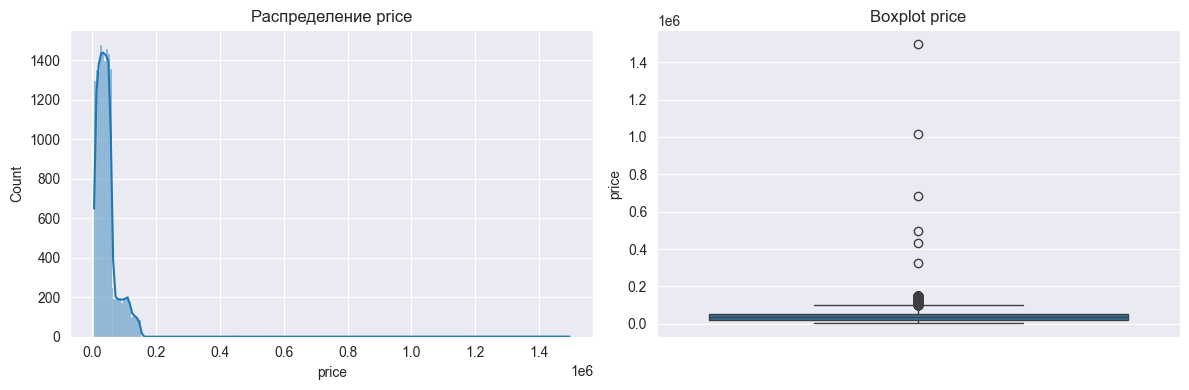

In [284]:
#!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!?????????????????????????????????????

numeric_col = 'price'

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
sns.histplot(df[numeric_col], kde=True)
plt.title(f'Распределение {numeric_col}')

plt.subplot(1, 2, 2)
sns.boxplot(y=df[numeric_col])
plt.title(f'Boxplot {numeric_col}')
plt.tight_layout()
plt.show()

### 4.2. Анализ категориального признака

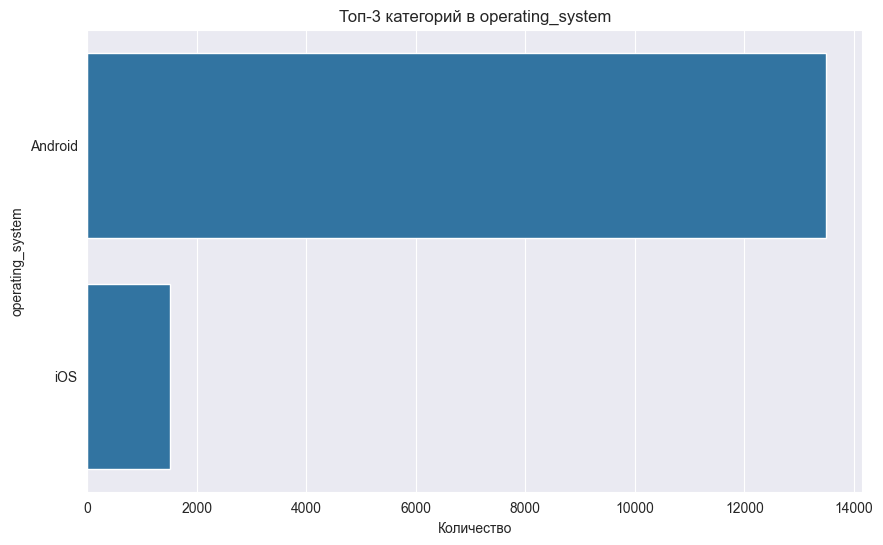

In [285]:
#!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!?????????????????????????????????????

cat_col = 'operating_system'

n = len(df[cat_col].unique())

plt.figure(figsize=(10, 6))
top_categories = df[cat_col].value_counts().head(10)
sns.barplot(x=top_categories.values, y=top_categories.index)
plt.title(f'Топ-{n} категорий в {cat_col}')
plt.xlabel('Количество')
plt.show()

## 5. Выводы

Детали в файле `report/quality_report.md`